In [1]:
import os
import glob

from flox.xarray import xarray_reduce
import xarray as xr
import hvplot.xarray
import holoviews as hv
from holoviews import opts
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
SAVE_FIGS = True
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw'

In [3]:
path = os.path.join(REPO_ROOT, 'data/interim', 
                    'geopolar_climatology_chesapeake.nc')
clim = xr.open_dataarray(path)
path = os.path.join(REPO_ROOT, 'data/interim', 
                    'geopolar_threshold_chesapeake.nc')
thresh = xr.open_dataarray(path)
path = os.path.join(REPO_ROOT, 'data/raw', 
                    'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc')
geopolar = xr.open_dataset(path).analysed_sst

In [4]:
geopolar = geopolar.sel(time=slice('2003-01-01', '2022-12-31'))
clim = clim.sel(time=slice('2003-01-01', '2022-12-31'))
thresh = thresh.sel(time=slice('2003-01-01', '2022-12-31'))

In [5]:
anom = geopolar - clim
mhw_spikes = anom.where(geopolar > thresh)
mhw_spikes = mhw_spikes.rename('anom_mhspikes')
mhw_spikes.attrs['units'] = 'Kelvin'

### Random -- delete later

In [85]:
geopolar

<xarray.DataArray 'analysed_sst' (time: 7298, lat: 65, lon: 40)>
array([[[      nan,       nan, ..., 282.81   , 283.07   ],
        [      nan,       nan, ..., 282.72998, 283.     ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ..., 282.52   , 282.68   ],
        [      nan,       nan, ..., 282.44998, 282.61   ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ..., 282.49   , 282.63   ],
        [      nan,       nan, ..., 282.13   , 282.28   ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ..., 282.03   , 282.24   ],
        [      nan,       nan, ..., 281.77   , 281.97998],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01T12:00:00 ... 2022-12-31T12:00:00
  * lat      (lat) float32 36.78 36.83 36.88 36.92 ... 39.83 39.88 39.92 39.97
  * lon      (lon) float32 -77.47 -77.43 -77.38 -77.32 ... -75.62 -75.57 -75.53
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    reference:      Fieguth,P.W. et al. "Mapping Mediterranean altimeter data...
    source:         STAR-ACSPO_GAC, STAR-ACSPO_H-8, STAR-Geo_SST, UKMO-OSTIA
    comment:        Analysed SST for each ocean grid point

/Users/rwegener/miniconda3/envs/chesapeake_mhw/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


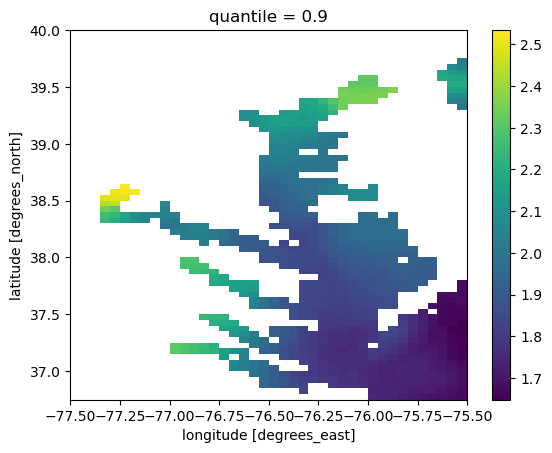

In [59]:
anom.quantile(0.9, 'time').plot()

In [60]:
import scipy.stats

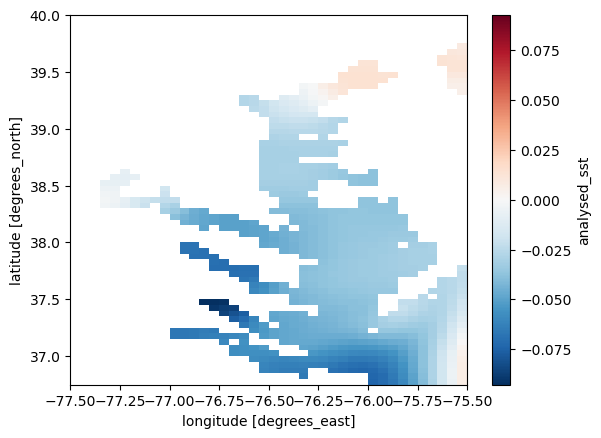

In [61]:
geopolar.reduce(func=scipy.stats.skew, dim="time").plot()

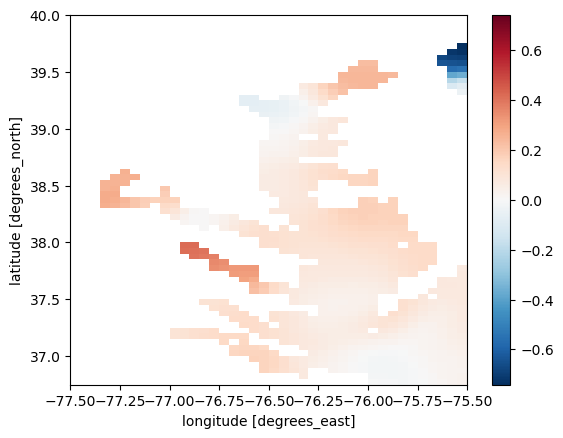

In [62]:
anom.reduce(func=scipy.stats.skew, dim="time").plot()

/Users/rwegener/miniconda3/envs/chesapeake_mhw/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


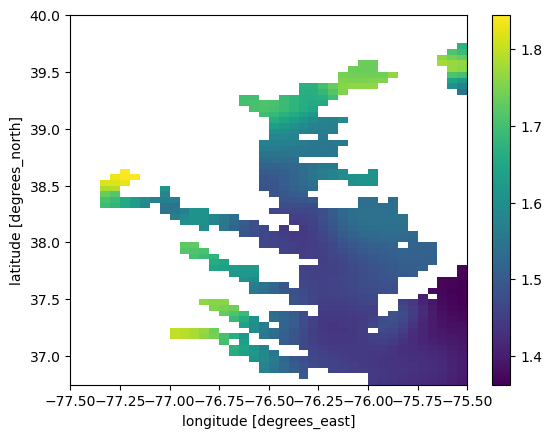

In [63]:
anom.std('time').plot()

/Users/rwegener/miniconda3/envs/chesapeake_mhw/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


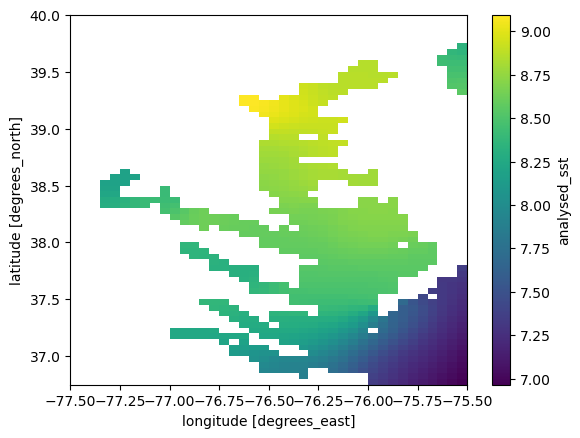

In [64]:
geopolar.std('time').plot()

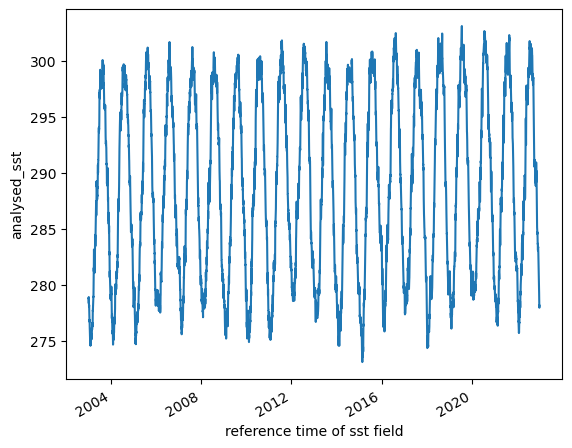

In [91]:
geopolar.mean(['lat', 'lon']).plot()

(array([   942.,   5624.,  19768.,  35424.,  49419.,  68381.,  88433.,
        111030., 136766., 159886., 178018., 186143., 177763., 169451.,
        164053., 150934., 137087., 125513., 125023., 120257., 116923.,
        118586., 123137., 126266., 119371., 117036., 114466., 110016.,
        106110., 102341.,  99524.,  99113., 109954., 104762., 102602.,
        125911., 144464., 151227., 182491., 203721., 233496., 238146.,
        225648., 180759., 137547.,  88701.,  45251.,  18694.,   3658.,
           458.]),
 array([271.47998047, 272.14138794, 272.80279541, 273.46417236,
        274.12557983, 274.7869873 , 275.44839478, 276.10977173,
        276.7711792 , 277.43258667, 278.09399414, 278.75537109,
        279.41677856, 280.07818604, 280.73959351, 281.40097046,
        282.06237793, 282.7237854 , 283.38519287, 284.04656982,
        284.70797729, 285.36938477, 286.03079224, 286.69216919,
        287.35357666, 288.01498413, 288.6763916 , 289.33779907,
        289.99917603, 290.6605835 , 

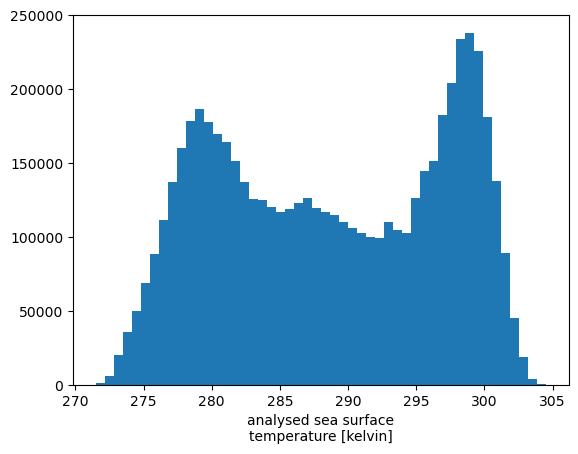

In [88]:
geopolar.plot.hist(bins=50)

(array([ 34.,  69.,  92., 137., 118., 185., 177., 207., 224., 234., 210.,
        168., 129., 148., 143., 161., 134., 153., 143., 119., 114., 148.,
        125., 116., 162., 134., 131., 120., 110., 106., 101., 112., 102.,
        122., 111., 155., 141., 169., 146., 140., 227., 269., 248., 286.,
        233., 212., 148.,  79.,  38.,   8.]),
 array([271.58999634, 272.22738647, 272.86480713, 273.50219727,
        274.1395874 , 274.77700806, 275.41439819, 276.05178833,
        276.68920898, 277.32659912, 277.96398926, 278.60140991,
        279.23880005, 279.87619019, 280.51358032, 281.15100098,
        281.78839111, 282.42578125, 283.0632019 , 283.70059204,
        284.33798218, 284.97540283, 285.61279297, 286.25018311,
        286.88760376, 287.5249939 , 288.16238403, 288.79980469,
        289.43719482, 290.07458496, 290.71200562, 291.34939575,
        291.98678589, 292.62420654, 293.26159668, 293.89898682,
        294.53640747, 295.17379761, 295.81118774, 296.44857788,
        297.085998

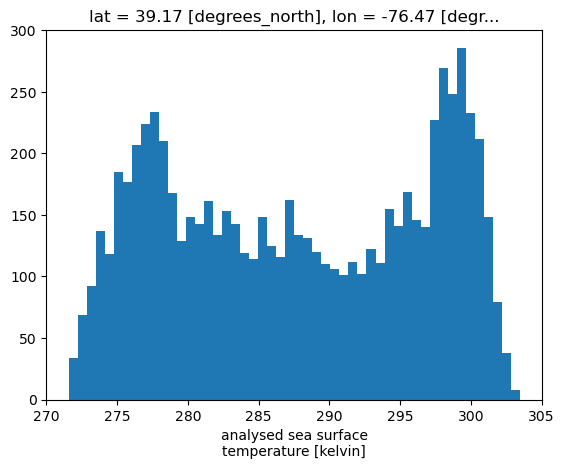

In [86]:
# one baltimore pixel
geopolar.sel(lat=39.19, lon=-76.5, method='nearest').plot.hist(bins=50)

(array([  4.,   8.,  10.,  14.,  10.,  14.,  20.,  29.,  31.,  40.,  79.,
        105., 115., 150., 186., 216., 245., 322., 314., 382., 337., 411.,
        441., 402., 378., 355., 358., 339., 309., 293., 266., 255., 205.,
        185., 162., 123., 100.,  60.,  41.,  37.,  23.,  16.,   9.,   9.,
          4.,   1.,   2.,   0.,   2.,   3.]),
 array([-5.53549391, -5.30445494, -5.07341596, -4.84237698, -4.61133801,
        -4.38029903, -4.14926006, -3.91822108, -3.68718211, -3.45614313,
        -3.22510415, -2.99406518, -2.7630262 , -2.53198723, -2.30094825,
        -2.06990927, -1.8388703 , -1.60783132, -1.37679235, -1.14575337,
        -0.91471439, -0.68367542, -0.45263644, -0.22159747,  0.00944151,
         0.24048048,  0.47151946,  0.70255844,  0.93359741,  1.16463639,
         1.39567536,  1.62671434,  1.85775332,  2.08879229,  2.31983127,
         2.55087024,  2.78190922,  3.01294819,  3.24398717,  3.47502615,
         3.70606512,  3.9371041 ,  4.16814307,  4.39918205,  4.63022103,
 

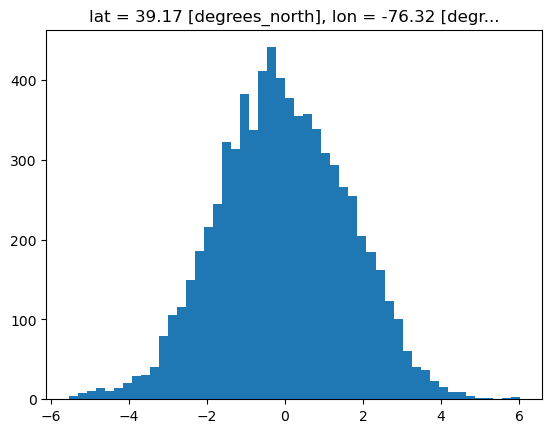

In [71]:
# outsie baltimore pixel
anom.sel(lat=39.17, lon=-76.33, method='nearest').plot.hist(bins=50)

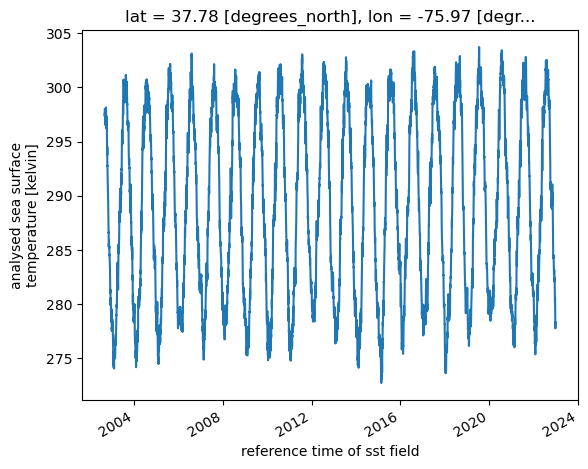

In [67]:
geopolar.sel(lat=37.76, lon=-76.0, method='nearest').plot()

(array([  1.,   3.,   6.,   7.,   9.,  13.,  11.,  13.,  29.,  27.,  39.,
         63.,  93., 131., 174., 232., 293., 350., 418., 405., 400., 427.,
        447., 465., 445., 470., 429., 385., 319., 274., 229., 199., 150.,
        108.,  92.,  74.,  61.,  42.,  23.,  22.,  12.,  12.,   2.,   8.,
          2.,   1.,   1.,   1.,   1.,   2.]),
 array([-5.51225921, -5.27674104, -5.04122287, -4.8057047 , -4.57018653,
        -4.33466836, -4.09915019, -3.86363202, -3.62811386, -3.39259569,
        -3.15707752, -2.92155935, -2.68604118, -2.45052301, -2.21500484,
        -1.97948667, -1.74396851, -1.50845034, -1.27293217, -1.037414  ,
        -0.80189583, -0.56637766, -0.33085949, -0.09534132,  0.14017684,
         0.37569501,  0.61121318,  0.84673135,  1.08224952,  1.31776769,
         1.55328586,  1.78880403,  2.02432219,  2.25984036,  2.49535853,
         2.7308767 ,  2.96639487,  3.20191304,  3.43743121,  3.67294938,
         3.90846755,  4.14398571,  4.37950388,  4.61502205,  4.85054022,
 

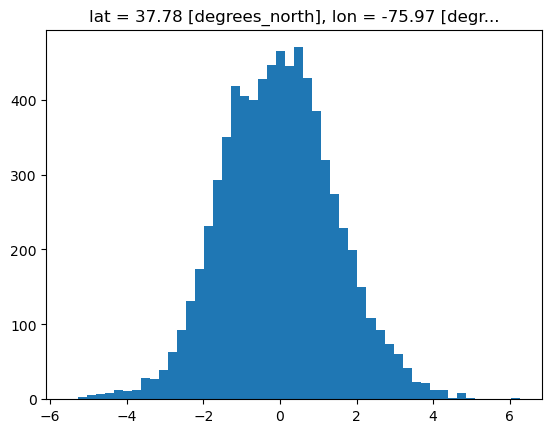

In [69]:
anom.sel(lat=37.76, lon=-76.0, method='nearest').plot.hist(bins=50)

### Convincing myself I'm not loosing it

In [95]:
import numpy as np

In [104]:
x = np.linspace(0, 6.28, 100)

In [112]:
y = -np.cos(x) + 10

In [113]:
y

array([ 9.        ,  9.00201128,  9.00803704,  9.01805304,  9.03201898,
        9.0498787 ,  9.07156034,  9.09697668,  9.12602551,  9.15858995,
        9.19453902,  9.23372811,  9.27599958,  9.32118339,  9.36909778,
        9.41955003,  9.47233717,  9.52724687,  9.58405825,  9.64254278,
        9.70246521,  9.76358449,  9.82565477,  9.88842637,  9.95164678,
       10.01506169, 10.07841602, 10.14145491, 10.20392479, 10.26557437,
       10.32615565, 10.38542496, 10.44314387, 10.4990802 , 10.55300895,
       10.60471318, 10.65398492, 10.70062595, 10.74444867, 10.7852768 ,
       10.8229461 , 10.85730504, 10.88821542, 10.91555289, 10.93920748,
       10.95908406, 10.97510265, 10.98719883, 10.99532393, 10.99944528,
       10.99954629, 10.99562656, 10.98770186, 10.97580406, 10.95998102,
       10.94029639, 10.91682936, 10.88967432, 10.85894051, 10.82475155,
       10.78724498, 10.74657166, 10.7028952 , 10.6563913 , 10.60724703,
       10.55566006, 10.50183791, 10.44599708, 10.38836221, 10.32

(array([22.,  8.,  8.,  6.,  6.,  6.,  8.,  6., 10., 20.]),
 array([ 9.        ,  9.19995463,  9.39990926,  9.59986389,  9.79981852,
         9.99977315, 10.19972777, 10.3996824 , 10.59963703, 10.79959166,
        10.99954629]),
 <BarContainer object of 10 artists>)

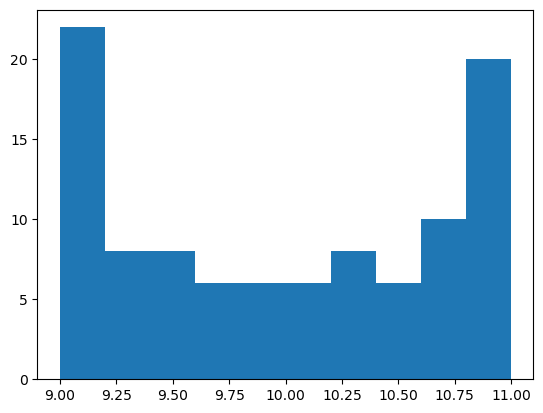

In [114]:
plt.hist(y)

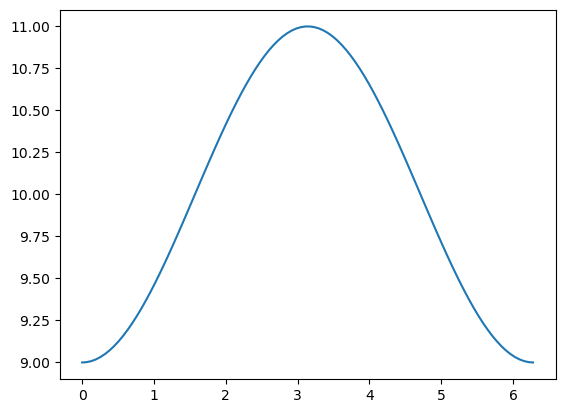

In [115]:
plt.plot(x, y)

### Back to notebook

My fav 25, 25 spot (sits in about the middle of the bay, at $38.0^oN$, $76.22^oW$)

In [5]:
mhw_spikes.isel(lat=25, lon=25).hvplot()  * hv.HLine(0).opts(opts.HLine(color='black'))

:Overlay
   .Curve.I :Curve   [time]   (thresh_anom)
   .HLine.I :HLine   [x,y]

In [5]:
mhw_spikes.isel(lat=25, lon=25).hvplot()

DataError: xarray DataArray does not define a name and Dataset does not define a default value dimension. Give the DataArray a name or supply an explicit vdim.

XArrayInterface expects gridded data, for more information on supported datatypes see http://holoviews.org/user_guide/Gridded_Datasets.html

## En route to creating a cinematic masterpiece

In [ ]:
geopolar_t0 = geopolar.isel(time=0)

In [ ]:
geopolar_t0

<xarray.DataArray 'analysed_sst' (lat: 65, lon: 40)>
array([[      nan,       nan,       nan, ..., 297.88998, 297.85   , 297.81   ],
       [      nan,       nan,       nan, ..., 297.84   , 297.8    , 297.75998],
       [      nan,       nan,       nan, ..., 297.78998, 297.75   , 297.72   ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2002-09-01T12:00:00
  * lat      (lat) float32 36.78 36.83 36.88 36.92 ... 39.83 39.88 39.92 39.97
  * lon      (lon) float32 -77.47 -77.43 -77.38 -77.32 ... -75.62 -75.57 -75.53
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    reference:      Fieguth,P.W. et al. "Mapping Mediterranean altimeter data...
    source:         STAR-ACSPO_GAC, STAR-ACSPO_H-8, STAR-Geo_SST, UKMO-OSTIA
    comment:        Analysed SST for each ocean grid point

In [ ]:
geopolar_t0.isnull()

<xarray.DataArray 'analysed_sst' (lat: 65, lon: 40)>
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
    time     datetime64[ns] 2002-09-01T12:00:00
  * lat      (lat) float32 36.78 36.83 36.88 36.92 ... 39.83 39.88 39.92 39.97
  * lon      (lon) float32 -77.47 -77.43 -77.38 -77.32 ... -75.62 -75.57 -75.53

We see that there are 803 total pixels in this region.

In [59]:
total_pixels = int(xr.where(geopolar_t0.isnull(), 0, 1).sum().values)

In [60]:
def percent_coverage(da):
    ret_val = False
    non_null = xr.where(da.isnull(), 0, 1).sum()
    if non_null / total_pixels > 0.2:
        ret_val = True
    return ret_val

End of day: turns out you can't group by multiple dimensions in xarray? I wanted to apply that percent_coverage function as an aggregator and then use a pandas diff to find the number of days between MHW, as a way of trying to manually split the dataset into MHWs.

Flox claims to group by muliple dimensions, but I can't figure out what is going on in the docs example. Why isn't the example reducing to 1D? [link](https://flox.readthedocs.io/en/latest/intro.html)

In [70]:
mhw_spikes

<xarray.DataArray 'thresh_anom' (time: 7710, lat: 65, lon: 40)>
array([[[        nan,         nan,         nan, ..., -1.80465196,
         -1.86121619, -1.90877105],
        [        nan,         nan,         nan, ..., -1.81564242,
         -1.87364994, -1.922046  ],
        [        nan,         nan,         nan, ..., -1.83188516,
         -1.89238035, -1.93386309],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -2.10034731,
         -2.14202832, -2.1642398 ],
        [        nan,         nan,         nan, ..., -2.1040042 ,
         -2.14516257, -2.159141  ],
        [        nan,         nan,         nan, ..., -2.09150725,
         -2.13653899, -2.16255818],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -2.60914661,
         -2.67401399, -2.6963122 ],
        [        nan,         nan,         nan, ..., -2.63372557,
         -2.68639615, -2.71579432],
        [        nan,         nan,         nan, ..., -2.65842886,
         -2.69757818, -2.71431678],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2023-10-17T12:00:00
  * lat      (lat) float32 36.78 36.83 36.88 36.92 ... 39.83 39.88 39.92 39.97
  * lon      (lon) float32 -77.47 -77.43 -77.38 -77.32 ... -75.62 -75.57 -75.53

In [86]:
xarray_reduce(mhw_spikes, 'lat', 'lon', func="mean")

<xarray.DataArray 'thresh_anom' (time: 7710, lat: 65, lon: 40)>
array([[[        nan,         nan,         nan, ..., -1.80465196,
         -1.86121619, -1.90877105],
        [        nan,         nan,         nan, ..., -1.81564242,
         -1.87364994, -1.922046  ],
        [        nan,         nan,         nan, ..., -1.83188516,
         -1.89238035, -1.93386309],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -2.10034731,
         -2.14202832, -2.1642398 ],
        [        nan,         nan,         nan, ..., -2.1040042 ,
         -2.14516257, -2.159141  ],
        [        nan,         nan,         nan, ..., -2.09150725,
         -2.13653899, -2.16255818],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -2.60914661,
         -2.67401399, -2.6963122 ],
        [        nan,         nan,         nan, ..., -2.63372557,
         -2.68639615, -2.71579432],
        [        nan,         nan,         nan, ..., -2.65842886,
         -2.69757818, -2.71431678],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2023-10-17T12:00:00
  * lat      (lat) float64 36.78 36.83 36.88 36.92 ... 39.83 39.88 39.92 39.97
  * lon      (lon) float64 -77.47 -77.43 -77.38 -77.32 ... -75.62 -75.57 -75.53

In [78]:
import numpy as np

In [79]:
arr = np.ones((4, 12))
labels1 = np.array(["a", "a", "c", "c", "c", "b", "b", "c", "c", "b", "b", "f"])
labels2 = np.array([1, 2, 2, 1])

da = xr.DataArray(
    arr, dims=("x", "y"), coords={"labels2": ("x", labels2), "labels1": ("y", labels1)}
)
da

<xarray.DataArray (x: 4, y: 12)>
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Coordinates:
    labels2  (x) int64 1 2 2 1
    labels1  (y) <U1 'a' 'a' 'c' 'c' 'c' 'b' 'b' 'c' 'c' 'b' 'b' 'f'
Dimensions without coordinates: x, y

In [82]:
xarray_reduce(da, "labels1", "labels2", func="sum")

<xarray.DataArray (labels1: 4, labels2: 2)>
array([[ 4.,  4.],
       [ 8.,  8.],
       [10., 10.],
       [ 2.,  2.]])
Coordinates:
  * labels1  (labels1) object 'a' 'b' 'c' 'f'
  * labels2  (labels2) int64 1 2

In [73]:
mhw_spikes.groupby('lat').mean()

ValueError: cannot reduce over dimensions ['lat']. expected either '...' to reduce over all dimensions or one or more of ('time', 'lon').

In [8]:
air_ds = xr.tutorial.open_dataset('air_temperature').load()
air = air_ds.air
air_ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [9]:
air1d = air.sel(lat=40, lon=285)
air1d.hvplot()


:Curve   [time]   (air)

In [19]:
air.hvplot(groupby='time', width=500)

:DynamicMap   [time]
   :Image   [lon,lat]   (air)

## A simpler cinematic masterpiece

In [93]:
import os
import glob
import pickle
from datetime import timedelta

import pandas as pd

In [37]:
# gp_path = os.path.join(REPO_ROOT, 'data/raw', 'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc')
# clim_path = os.path.join(REPO_ROOT, 'data/interim', 'geopolar_climatology_chesapeake.nc')
# thresh_path = os.path.join(REPO_ROOT, 'data/interim', 'geopolar_threshold_chesapeake.nc')
# geopolar = xr.open_dataset(gp_path).analysed_sst
# clim = xr.open_dataset(clim_path).climatology
# thresh = xr.open_dataset(thresh_path).threshold

In [8]:
anom = geopolar - clim
spikes = anom.where(geopolar > thresh)

In [9]:
spikes.max()

<xarray.DataArray ()>
array(7.86924498)

**TODO** why not `ax=ax` in .plot()? Is that partly cause of the TypeError?

In [6]:
def create_plot(spikes, date): 
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add background features
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.5, -75.4, 36.6, 39.7])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False

    try:
        # ax=ax?
        spikes.sel(time=date).plot(ax=ax, cmap='Reds', vmin=0, vmax=8)
    except TypeError:
        pass

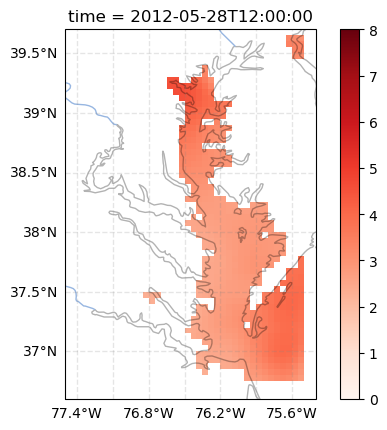

In [10]:
create_plot(spikes, date='2012-05-28')

Text(-0.02, 0, 'Next MHW')

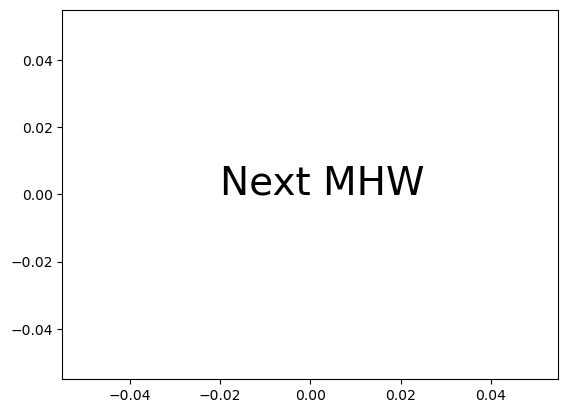

In [71]:
plt.plot()
plt.text(-0.02, 0, 'Next MHW', size=28)

In [11]:
path = os.path.join(REPO_ROOT, 'data/interim', 'mhw_eventstats_dict.pickle')
with open(path, 'rb') as f:
    mhw_stats = pickle.load(f)

In [12]:
mhw_onepoint = mhw_stats[25, 25]

In [89]:
# Create the list of dates for the video
dates_list = []
buffer = timedelta(days=10)
for mhw_start, mhw_end in zip(mhw_onepoint['date_start'], mhw_onepoint['date_end']):
    dates_list.extend(pd.date_range('1900-01-01', '1900-01-03'))
    dates_list.extend(pd.date_range(mhw_start-buffer, mhw_end+buffer))

dates_list = [d.strftime('%Y-%m-%d') for d in dates_list]

In [104]:
dates_list[1177:]

['2019-05-24',
 '2019-05-25',
 '2019-05-26',
 '2019-05-27',
 '2019-05-28',
 '2019-05-29',
 '2019-05-30',
 '2019-05-31',
 '2019-06-01',
 '2019-06-02',
 '2019-06-03',
 '2019-06-04',
 '2019-06-05',
 '2019-06-06',
 '2019-06-07',
 '2019-06-08',
 '2019-06-09',
 '2019-06-10',
 '2019-06-11',
 '2019-06-12',
 '2019-06-13',
 '2019-06-14',
 '2019-06-15',
 '1900-01-01',
 '1900-01-02',
 '1900-01-03',
 '2019-06-23',
 '2019-06-24',
 '2019-06-25',
 '2019-06-26',
 '2019-06-27',
 '2019-06-28',
 '2019-06-29',
 '2019-06-30',
 '2019-07-01',
 '2019-07-02',
 '2019-07-03',
 '2019-07-04',
 '2019-07-05',
 '2019-07-06',
 '2019-07-07',
 '2019-07-08',
 '2019-07-09',
 '2019-07-10',
 '2019-07-11',
 '2019-07-12',
 '2019-07-13',
 '2019-07-14',
 '2019-07-15',
 '2019-07-16',
 '2019-07-17',
 '1900-01-01',
 '1900-01-02',
 '1900-01-03',
 '2019-07-05',
 '2019-07-06',
 '2019-07-07',
 '2019-07-08',
 '2019-07-09',
 '2019-07-10',
 '2019-07-11',
 '2019-07-12',
 '2019-07-13',
 '2019-07-14',
 '2019-07-15',
 '2019-07-16',
 '2019-07-

In [111]:
image_dir = 'video_images'
if os.path.exists(image_dir):
    # if the directory exists, clean it
    files = glob.glob(image_dir + '/*')
    for f in files:
        os.remove(f)
else:
    # if it doesn't exist, create it
    os.mkdir(image_dir)

In [112]:
for i, d in enumerate(dates_list):
    if d.startswith('1900'):
        plt.plot()
        plt.text(-0.02, 0, 'Next MHW', size=28)
        plt.savefig(os.path.join(image_dir, str(i).zfill(5)))
        plt.close()
    else:
        create_plot(spikes, date=d)
        plt.savefig(os.path.join(image_dir, str(i).zfill(5)))
        plt.close()

Video made with:

```
ffmpeg -r 3 -i %05d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4
```

## Extacting specific heatwaves

In [5]:
fall05 = mhw_spikes.sel(time=slice('2005-09-16', '2005-10-01'))
sum12 = mhw_spikes.sel(time=slice('2012-05-14', '2012-06-14'))
sum16 = mhw_spikes.sel(time=slice('2016-07-11', '2016-09-20'))
sum19 = mhw_spikes.sel(time=slice('2019-04-08', '2019-06-15'))

### Plotting Fall 2005 MHW

Other options:
- Oct 2015 - Jan 2016: could do. https://www.nature.com/articles/s41598-021-97012-0
- 2012: Basically one long heatwave. Might be hard to make an evolution map out of that.
- Jul - Sept 2016: Could be interesting. Nice succinct evolution initially. Maybe some follow on MHW as well. (**Dates:** 2016-07-13 - 2016-08-02 (first one) 2016-09-12 PLUS some (full season))

In [22]:
mhw_spikes.sel(time=slice('2005-09-17', '2005-09-27')).min()

<xarray.DataArray 'anom_mhspikes' ()>
array(1.48502374)

In [24]:
mhw_spikes.sel(time=slice('2005-09-17', '2005-09-27')).max()

<xarray.DataArray 'anom_mhspikes' ()>
array(3.00917595)

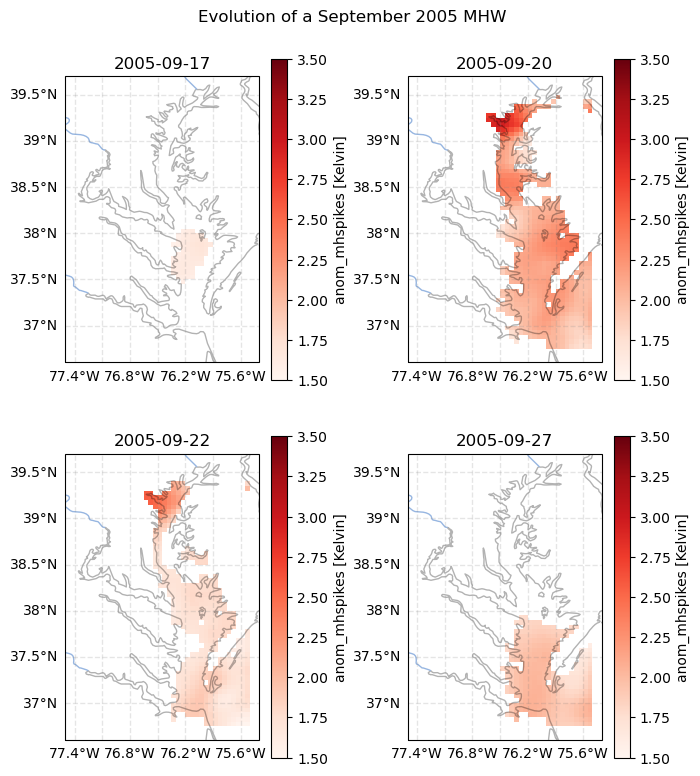

In [9]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(7, 8)
fig.suptitle('Evolution of a September 2005 MHW')

# Add background features
for ax in axes.flatten():
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.5, -75.4, 36.6, 39.7])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False

# Add anomaly data
vmin, vmax = 1.5, 3.5
date = '2005-09-17'
mhw_spikes.sel(time=date).plot(ax=axes[0, 0], cmap='Reds', vmin=vmin, vmax=vmax)
axes[0, 0].set_title(date)

date = '2005-09-20'
mhw_spikes.sel(time=date).plot(ax=axes[0, 1], cmap='Reds', vmin=vmin, vmax=vmax)
axes[0, 1].set_title(date)

date = '2005-09-22'
mhw_spikes.sel(time=date).plot(ax=axes[1, 0], cmap='Reds', vmin=vmin, vmax=vmax)
axes[1, 0].set_title(date)

date = '2005-09-27'
mhw_spikes.sel(time=date).plot(ax=axes[1, 1], cmap='Reds', vmin=vmin, vmax=vmax)
axes[1, 1].set_title(date)

plt.tight_layout()

if SAVE_FIGS: 
    plt.savefig('../figures/evolution_2005.pdf', bbox_inches='tight', dpi=400)

In [15]:
mhw_gp = geopolar.sel(time=slice('2005-09-17', '2005-09-27'))

In [19]:
mhw_gp.min(), mhw_gp.max()

(<xarray.DataArray 'analysed_sst' ()>
 array(294.75, dtype=float32),
 <xarray.DataArray 'analysed_sst' ()>
 array(299.4, dtype=float32))

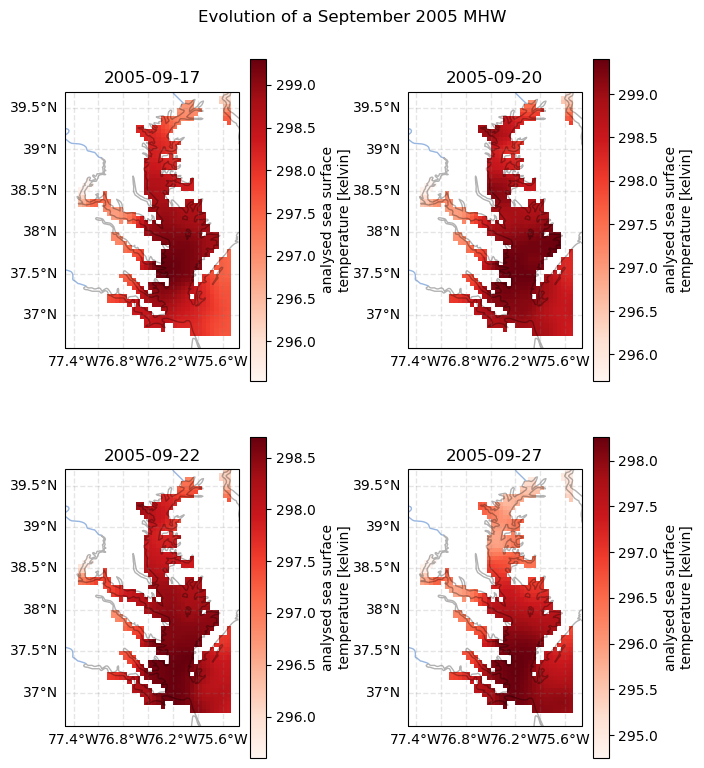

In [21]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(7, 8)
fig.suptitle('Evolution of a September 2005 MHW')

# Add background features
for ax in axes.flatten():
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.5, -75.4, 36.6, 39.7])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False

# Add anomaly data
vmin, vmax = 294, 300

date = '2005-09-17'
geopolar.sel(time=date).plot(ax=axes[0, 0], cmap='Reds')
axes[0, 0].set_title(date)

date = '2005-09-20'
geopolar.sel(time=date).plot(ax=axes[0, 1], cmap='Reds')
axes[0, 1].set_title(date)

date = '2005-09-22'
geopolar.sel(time=date).plot(ax=axes[1, 0], cmap='Reds')
axes[1, 0].set_title(date)

date = '2005-09-27'
geopolar.sel(time=date).plot(ax=axes[1, 1], cmap='Reds')
axes[1, 1].set_title(date)

plt.tight_layout()

# if SAVE_FIGS: 
#     plt.savefig('../figures/evolution_2005.pdf', bbox_inches='tight', dpi=400)

In [124]:
geopolar.sel(time=date).min(), geopolar.sel(time=date).max()

(<xarray.DataArray 'analysed_sst' ()>
 array(295.69998, dtype=float32),
 <xarray.DataArray 'analysed_sst' ()>
 array(299.4, dtype=float32))

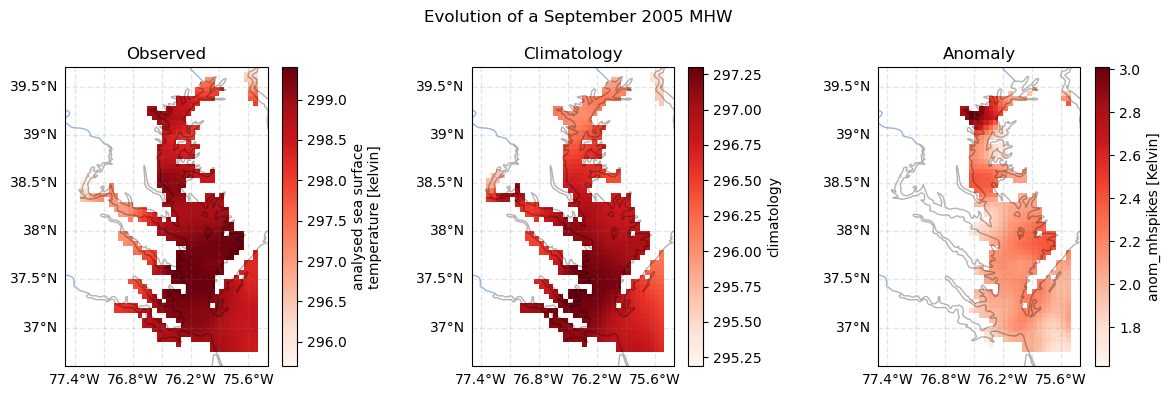

In [126]:
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(12, 4)
fig.suptitle('Evolution of a September 2005 MHW')

# Add background features
for ax in axes.flatten():
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.5, -75.4, 36.6, 39.7])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False

# Add anomaly data
vmin, vmax = 294, 300

date = '2005-09-20'
geopolar.sel(time=date).plot(ax=axes[0], cmap='Reds')  # , vmin=295.5, vmax=299.5)
axes[0].set_title('Observed')

date = '2005-09-20'
clim.sel(time=date).plot(ax=axes[1], cmap='Reds')  # , vmin=295.5, vmax=299.5)
axes[1].set_title('Climatology')

date = '2005-09-20'
mhw_spikes.sel(time=date).plot(ax=axes[2], cmap='Reds')
axes[2].set_title('Anomaly')

plt.tight_layout()

# if SAVE_FIGS: 
#     plt.savefig('../figures/evolution_2005.pdf', bbox_inches='tight', dpi=400)

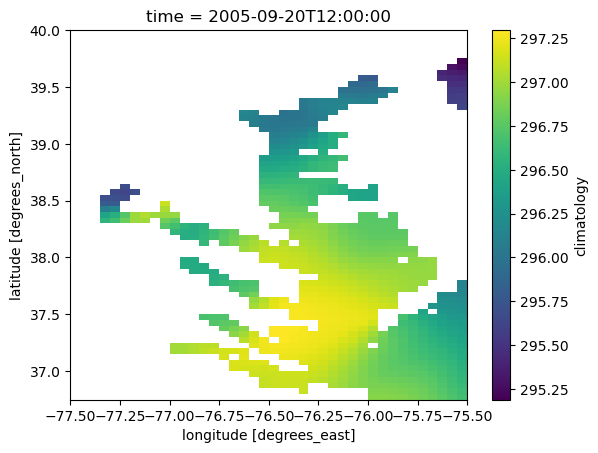

In [93]:
clim.sel(time='2005-09-20').plot()

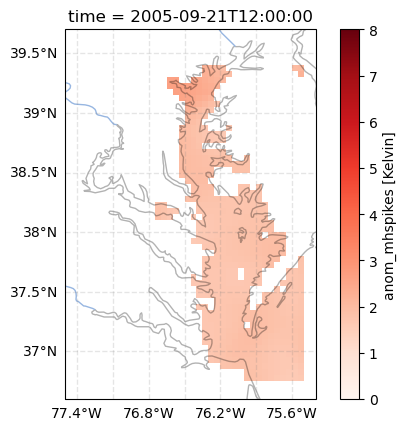

In [26]:
create_plot(mhw_spikes, '2005-09-21')

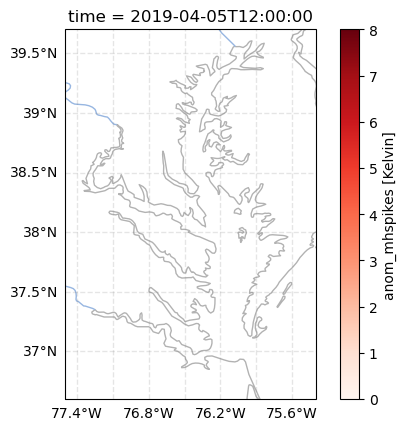

In [92]:
create_plot(mhw_spikes, '2019-04-05')

In [84]:
image_dirs = ['video_images_sum12', 'video_images_sum16', 'video_images_sum19']

In [85]:
for image_dir in image_dirs:
    if os.path.exists(image_dir):
        # if the directory exists, clean it
        files = glob.glob(image_dir + '/*')
        for f in files:
            os.remove(f)
    else:
        # if it doesn't exist, create it
        os.mkdir(image_dir)

In [86]:
for ds, image_dir in zip([sum12, sum16, sum19], image_dirs):
    for i, date in enumerate(ds.time):
        create_plot(ds, date=date.values)
        plt.savefig(os.path.join(image_dir, str(i).zfill(4)))
        plt.close()

Update: 
1. Path to image folder
2. Appropriate size of zfill zeros (here 4)
3. Name of output
```
ffmpeg -r 1 -i ./video_images_sum12/%04d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p summer12_mhw.mp4
```